# CVD Plots Notebook
This notebook uses colorspacious to apply a CVD lens to common radar colormaps as well as new CVD colormaps.
This notebook is a modified version of Jon Thielen's notebook found here:
https://nbviewer.org/urls/dl.dropbox.com/s/nvnav3m9x5w8xf1/spectral_reflectivity_cm.ipynb

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

from colorspacious import cspace_convert
import numpy as np
import pyart
import xarray as xr
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'axes.titlesize': 10})
matplotlib.rcParams.update({'axes.titley': .95}) 
matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams.update({'font.family': 'Arial'})


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [32]:
from pyart.testing import get_test_data

filename = get_test_data("110635.mdv")
radar = pyart.io.read(filename)

/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(


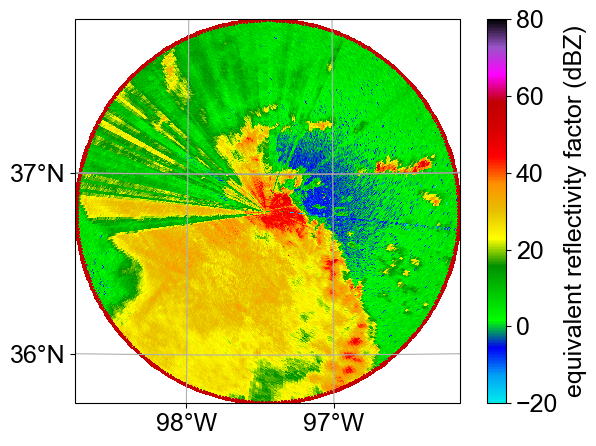

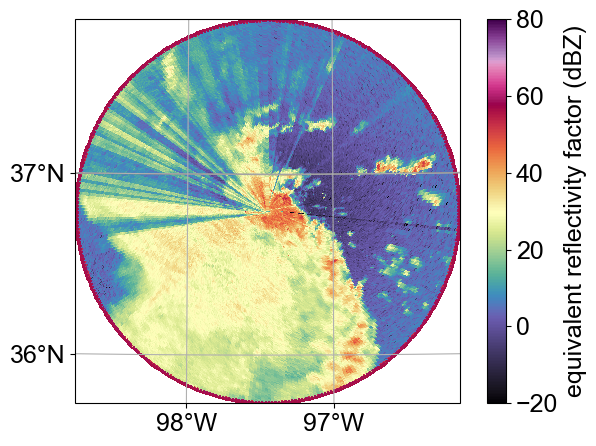

In [33]:
# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', vmin=-20, title_flag=False, vmax=80, ax=ax, cmap='pyart_NWSRef')
ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_nws = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_nws = image_from_plot_nws / 255.


# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', vmin=-20, title_flag=False, vmax=80, ax=ax, cmap='pyart_ChaseSpectral')
ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_chase = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_chase = image_from_plot_chase.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_chase = image_from_plot_chase / 255.


# Deuteranopia
cvd_space_d = {
    "name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100
}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_chase = cspace_convert(image_from_plot_chase, cvd_space_d, "sRGB1")


# Protanopia
cvd_space_p = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")

# Protanopia
cvd_space = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_chase = cspace_convert(image_from_plot_chase, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


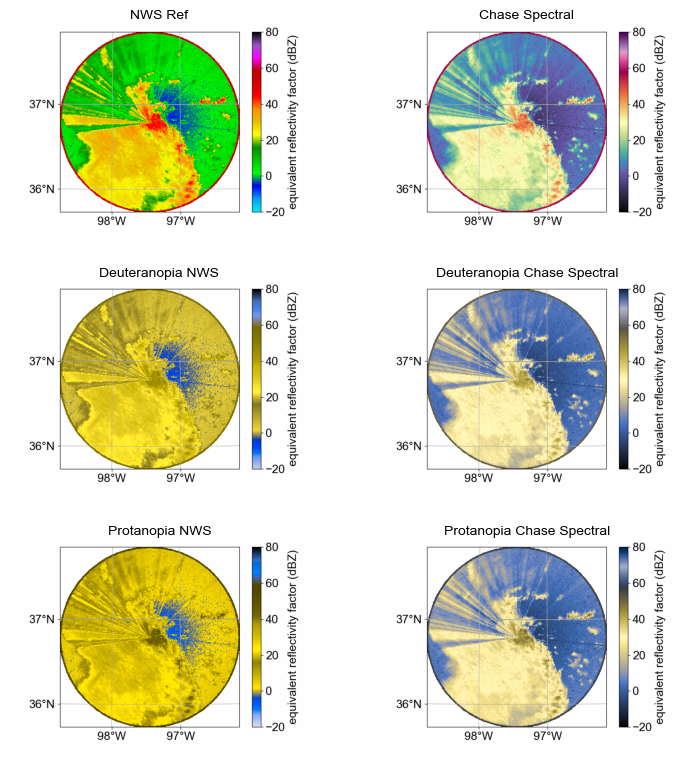

In [34]:
# Overall Figure
fig, axes = plt.subplot_mosaic(
    [
        ['ref', 'chase'],
        ['d_nws', 'd_chase'],
        ['p_nws', 'p_chase']
    ],
    figsize=(12, 8)
)


# Sample images
axes['ref'].imshow(image_from_plot_nws)
axes['ref'].axis('off')
axes['ref'].set_title("NWS Ref")

axes['chase'].imshow(image_from_plot_chase)
axes['chase'].axis('off')
axes['chase'].set_title("Chase Spectral")

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS")


axes['d_chase'].imshow(img_d_chase)
axes['d_chase'].axis('off')
axes['d_chase'].set_title("Deuteranopia Chase Spectral")

axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS")

axes['p_chase'].imshow(img_p_chase)
axes['p_chase'].axis('off')
axes['p_chase'].set_title("Protanopia Chase Spectral")
#plt.subplots_adjust(wspace=-.2, hspace=-.2)
#plt.tight_layout()
plt.savefig('cvd_ref_mc3e.png', bbox_inches='tight', dpi=900)

In [46]:
nyq = radar.instrument_parameters['nyquist_velocity']['data'][0]

/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(


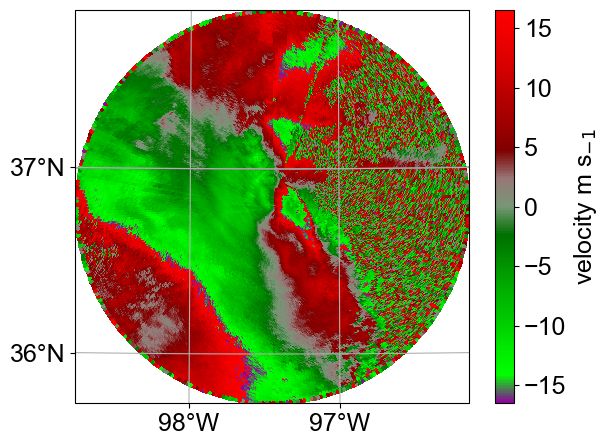

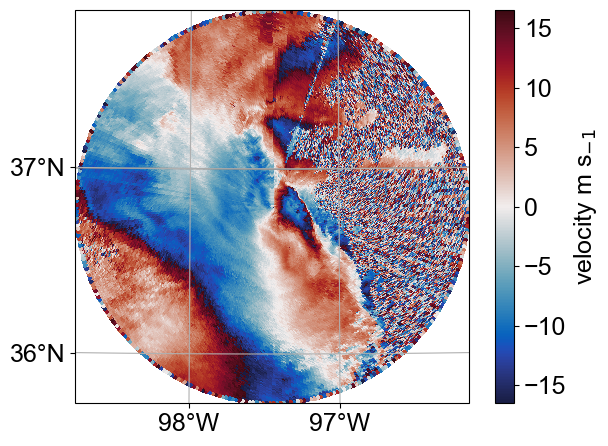

In [69]:
# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('velocity', sweep=1, vmin=-nyq, title_flag=False, vmax=nyq, ax=ax, cmap='pyart_NWSVel',
                     colorbar_label=r'velocity m s$_{-1}$')
ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_nws = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_nws = image_from_plot_nws / 255.


# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('velocity', sweep=1, vmin=-nyq, title_flag=False, vmax=nyq, ax=ax, cmap='pyart_balance',
                     colorbar_label=r'velocity m s$_{-1}$')
ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_chase = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_chase = image_from_plot_chase.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_chase = image_from_plot_chase / 255.


# Deuteranopia
cvd_space_d = {
    "name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100
}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_chase = cspace_convert(image_from_plot_chase, cvd_space_d, "sRGB1")


# Protanopia
cvd_space_p = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")

# Protanopia
cvd_space = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_chase = cspace_convert(image_from_plot_chase, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


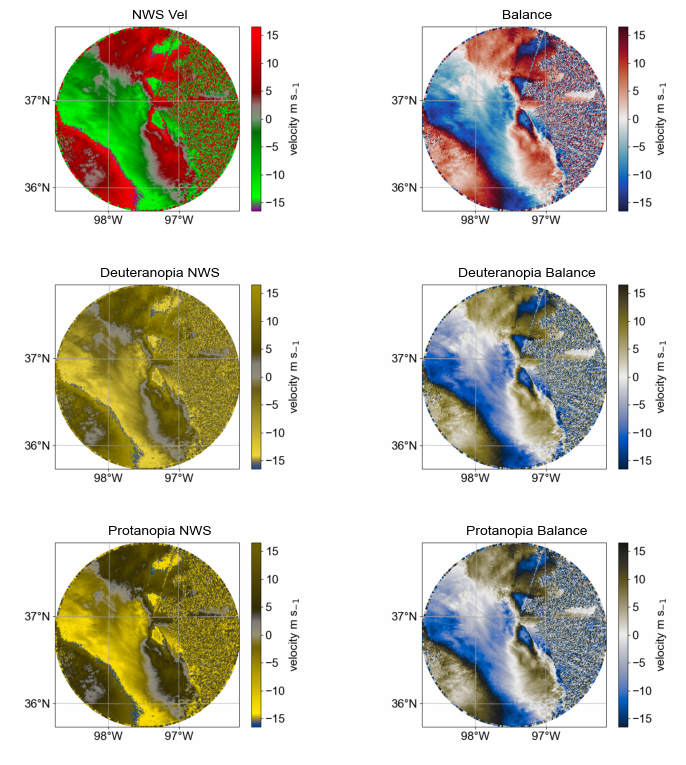

In [70]:
# Overall Figure
fig, axes = plt.subplot_mosaic(
    [
        ['vel', 'chase'],
        ['d_nws', 'd_chase'],
        ['p_nws', 'p_chase']
    ],
    figsize=(12, 8)
)


# Sample images
axes['vel'].imshow(image_from_plot_nws)
axes['vel'].axis('off')
axes['vel'].set_title("NWS Vel")

axes['chase'].imshow(image_from_plot_chase)
axes['chase'].axis('off')
axes['chase'].set_title("Balance")

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS")


axes['d_chase'].imshow(img_d_chase)
axes['d_chase'].axis('off')
axes['d_chase'].set_title("Deuteranopia Balance")

axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS")

axes['p_chase'].imshow(img_p_chase)
axes['p_chase'].axis('off')
axes['p_chase'].set_title("Protanopia Balance")

plt.savefig('cvd_vel.png', bbox_inches='tight', dpi=900)

In [22]:
radar.fields.keys()

dict_keys(['cross_correlation_ratio', 'specific_differential_phase', 'reflectivity', 'differential_phase', 'velocity', 'differential_reflectivity', 'spectrum_width', 'normalized_coherent_power'])

In [23]:
radar = pyart.io.read('KAMA20180512_003440_V06')

/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(
/Users/zsherman/dev/pyart/pyart/graph/radarmapdisplay.py:299: UserWarning: No projection was defined for the axes. Overridding defined axes and using default axes with projection Lambert Conformal.
  warnings.warn(


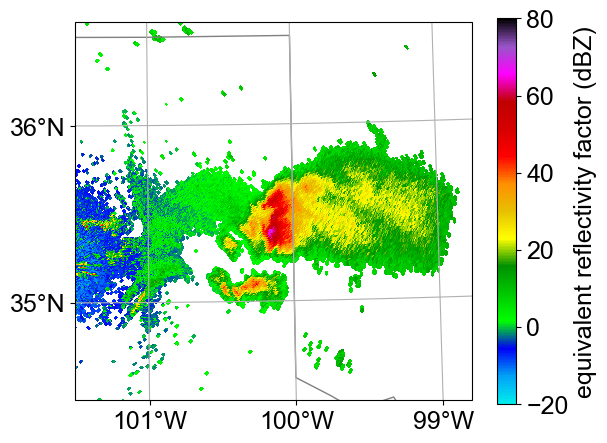

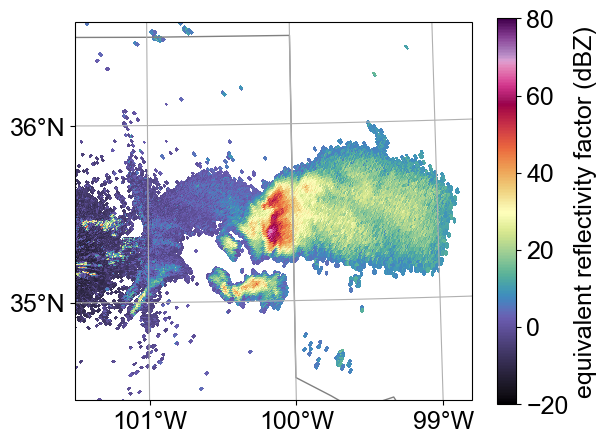

In [24]:
# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', vmin=-20, title_flag=False, vmax=80, ax=ax, cmap='pyart_NWSRef',
                     min_lon=-101.5, max_lon=-98.8, min_lat=34.45, max_lat=36.55)
ax.axis('off')
fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_nws = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_nws = image_from_plot_nws / 255.


# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', vmin=-20, title_flag=False, vmax=80, ax=ax, cmap='pyart_ChaseSpectral',
                     min_lon=-101.5, max_lon=-98.8, min_lat=34.45, max_lat=36.55)

ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_chase = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_chase = image_from_plot_chase.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_chase = image_from_plot_chase / 255.


# Deuteranopia
cvd_space_d = {
    "name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100
}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_chase = cspace_convert(image_from_plot_chase, cvd_space_d, "sRGB1")


# Protanopia
cvd_space_p = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")

# Protanopia
cvd_space = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_chase = cspace_convert(image_from_plot_chase, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


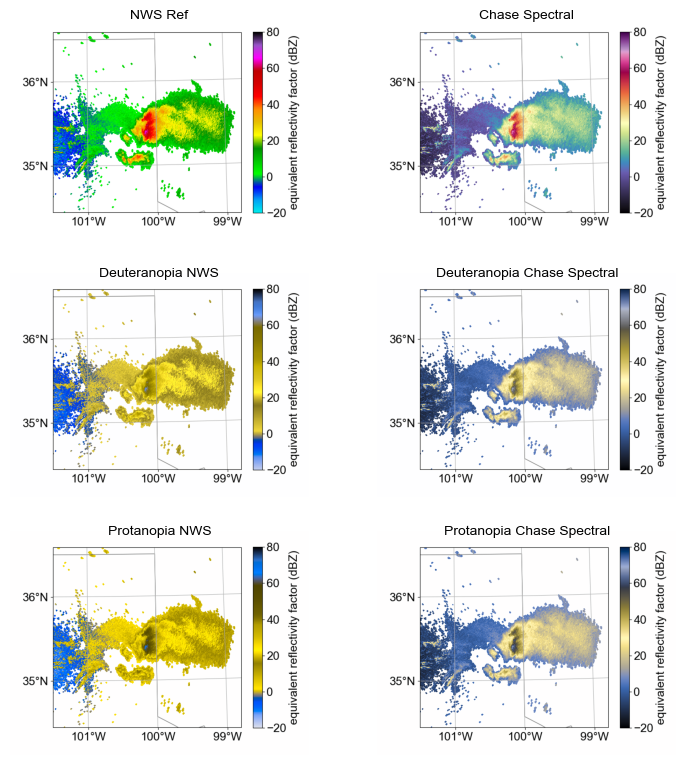

In [25]:
# Overall Figure
fig, axes = plt.subplot_mosaic(
    [
        ['ref', 'chase'],
        ['d_nws', 'd_chase'],
        ['p_nws', 'p_chase']
    ],
    figsize=(12, 8)
)


# Sample images
axes['ref'].imshow(image_from_plot_nws)
axes['ref'].axis('off')
axes['ref'].set_title("NWS Ref")

axes['chase'].imshow(image_from_plot_chase)
axes['chase'].axis('off')
axes['chase'].set_title("Chase Spectral")

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS")


axes['d_chase'].imshow(img_d_chase)
axes['d_chase'].axis('off')
axes['d_chase'].set_title("Deuteranopia Chase Spectral")

axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS")

axes['p_chase'].imshow(img_p_chase)
axes['p_chase'].axis('off')
axes['p_chase'].set_title("Protanopia Chase Spectral")
#plt.subplots_adjust(wspace=0, hspace=12)
#plt.tight_layout()
plt.savefig('cvd_pyro_ref.png', bbox_inches='tight', dpi=900)

In [26]:
radar = pyart.io.read('gucxprecipradarS2.00.20220314.024143.raw.csu.sail-20220314-024143_47667_22_328_RHI.nc')

/Users/zsherman/opt/anaconda3/envs/pyart_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


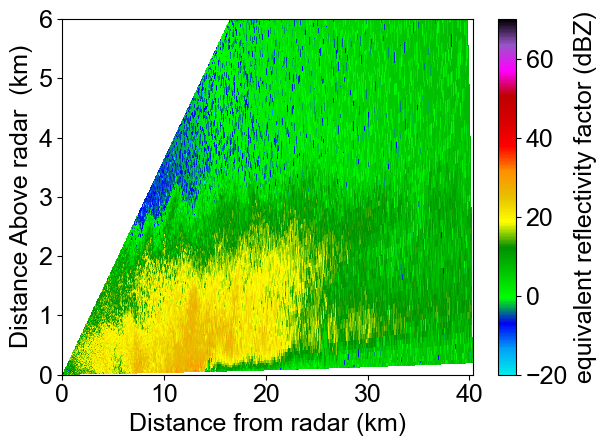

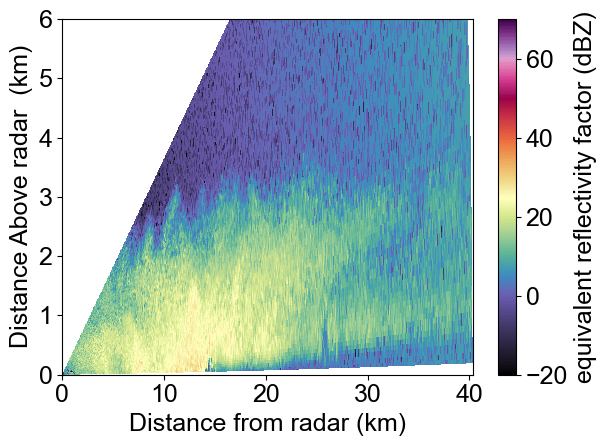

In [27]:
# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarDisplay(radar)
display.plot_rhi('DBZ', vmin=-20, title_flag=False, vmax=70, ax=ax, cmap='pyart_NWSRef')
plt.ylim(0, 6)
#ax.axis('off')
fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_nws = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_nws = image_from_plot_nws.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_nws = image_from_plot_nws / 255.


# Sample image in original RGB
fig = plt.figure()
ax = fig.gca()

display = pyart.graph.RadarDisplay(radar)
display.plot_rhi('DBZ', vmin=-20, title_flag=False, vmax=70, ax=ax, cmap='pyart_ChaseSpectral')
plt.ylim(0, 6)
#ax.axis('off')

fig.tight_layout(pad=0)
ax.margins(0)

fig.canvas.draw()       # draw the canvas, cache the renderer

image_from_plot_chase = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot_chase = image_from_plot_chase.reshape(fig.canvas.get_width_height()[::-1] + (3,))
image_from_plot_chase = image_from_plot_chase / 255.


# Deuteranopia
cvd_space_d = {
    "name": "sRGB1+CVD",
    "cvd_type": "deuteranomaly",
    "severity": 100
}
img_d_nws = cspace_convert(image_from_plot_nws, cvd_space_d, "sRGB1")
img_d_chase = cspace_convert(image_from_plot_chase, cvd_space_d, "sRGB1")


# Protanopia
cvd_space_p = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_nws = cspace_convert(image_from_plot_nws, cvd_space_p, "sRGB1")

# Protanopia
cvd_space = {
    "name": "sRGB1+CVD",
    "cvd_type": "protanomaly",
    "severity": 100
}
img_p_chase = cspace_convert(image_from_plot_chase, cvd_space_p, "sRGB1")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


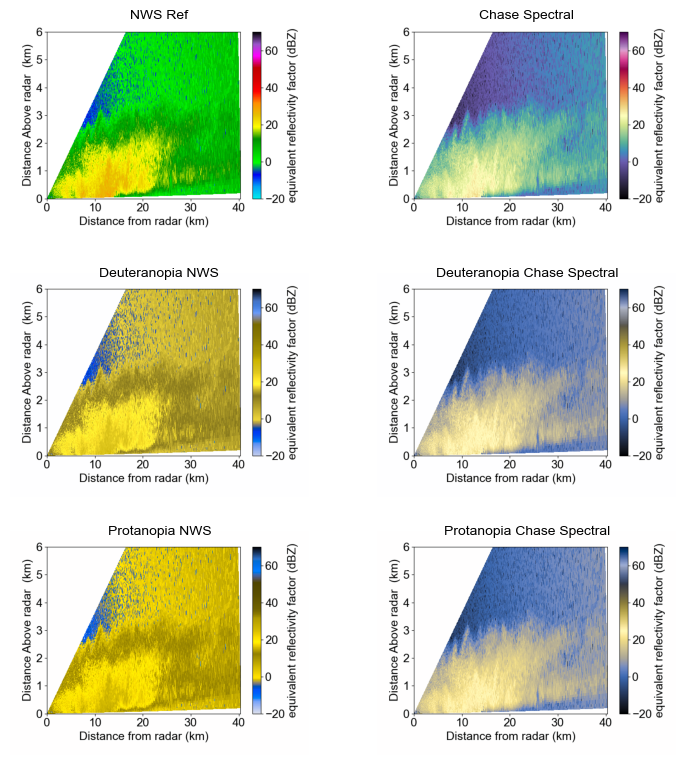

In [28]:
# Overall Figure
fig, axes = plt.subplot_mosaic(
    [
        ['ref', 'chase'],
        ['d_nws', 'd_chase'],
        ['p_nws', 'p_chase']
    ],
    figsize=(12, 8)
)


# Sample images
axes['ref'].imshow(image_from_plot_nws)
axes['ref'].axis('off')
axes['ref'].set_title("NWS Ref")

axes['chase'].imshow(image_from_plot_chase)
axes['chase'].axis('off')
axes['chase'].set_title("Chase Spectral")

axes['d_nws'].imshow(img_d_nws)
axes['d_nws'].axis('off')
axes['d_nws'].set_title("Deuteranopia NWS")


axes['d_chase'].imshow(img_d_chase)
axes['d_chase'].axis('off')
axes['d_chase'].set_title("Deuteranopia Chase Spectral")

axes['p_nws'].imshow(img_p_nws)
axes['p_nws'].axis('off')
axes['p_nws'].set_title("Protanopia NWS")

axes['p_chase'].imshow(img_p_chase)
axes['p_chase'].axis('off')
axes['p_chase'].set_title("Protanopia Chase Spectral")
#plt.subplots_adjust(wspace=0, hspace=12)
#plt.tight_layout()
plt.savefig('cvd_snow_ref.png', bbox_inches='tight', dpi=900)